In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import warnings
import sys
import metpy
import matplotlib
import matplotlib.gridspec as gridspec
import geopandas
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import netCDF4
from netCDF4 import Dataset
from satpy import Scene, find_files_and_readers
import sys
import os
import glob
from time import time
from datetime import datetime
from PIL import Image

In [3]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# stored in gdata/v46 so when launching ARE jupyter session need to specify storage gdata/hh5+gdata/v46
indir = '/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/' #'/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/L2/' 
print('indir: ',indir)
file = indir+'CTT_geocatL2.HIMAWARI-8.2022039.000000.FLDK.R20.nc'
print('file: ',file)
nc = Dataset(file, mode='r')                      # read the data 
print(type(nc))                                   # print the type of the data 
print(nc.variables.keys())

indir:  /g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/
file:  /g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.000000.FLDK.R20.nc
<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['Band1', 'crs', 'lat', 'lon'])


In [ ]:
ctt_ds = xr.open_dataset(file, engine="netcdf4")

projPC = ccrs.PlateCarree()
lonW = 140
lonE = 155
latS = -22
latN = -12
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '50m'
lon = ctt_ds["lon"]
lat = ctt_ds["lat"]

# greyscale + colour cmap

In [ ]:
colors1 = plt.cm.binary(np.linspace(0, 1, 67))
orig_map =plt.cm.get_cmap('gist_ncar')
rev_map = orig_map.reversed()
colors2 = rev_map(np.linspace(0, 1, 73))

# combine them and build a new colormap
colors = np.vstack((colors2[10:57], colors1))
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# greyscale cmap

In [ ]:
cmap = "binary"

In [ ]:
fig = plt.figure(figsize=(20, 10))
fig.tight_layout()
fig.patch.set_facecolor('white')
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Cloud Top Temperature',fontsize=25)
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.2, linestyle='-')
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
nan_cmap = np.isnan(ctt_ds["Band1"])
ax.pcolormesh(lon,lat,nan_cmap,color="black")
ax.coastlines(resolution=res, color='white')
clevels = range(180,300,1)
# for greyscale+colour cmap
# norm = mcolors.BoundaryNorm(clevels, cmap.N)
#cs = ax.contourf(lon,lat,ctt_ds["Band1"],levels=clevels,cmap=cmap,norm=norm)

# for greyscale cmap
cs = ax.contourf(lon,lat,ctt_ds["Band1"],levels=clevels,cmap=cmap)
cbar = plt.colorbar(cs,aspect=25,orientation='vertical',ax=ax,ticks=[180,190,200,210,220,230,240,250,260,270,280,290,300])
cbar.set_label('K',fontsize=20) 

# L1 brightness temp plots

In [5]:
# stored in gdata/v46 so when launching ARE jupyter session need to specify storage gdata/hh5+gdata/v46
indir = '/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/L1/' 
print('indir: ',indir)
file = indir+'geocatL1.HIMAWARI-8.2022045.170000.FLDK.R20.nc'
print('file: ',file)

indir:  /g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/L1/
file:  /g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/L1/geocatL1.HIMAWARI-8.2022045.170000.FLDK.R20.nc


In [6]:
ds = xr.open_dataset(file, engine="netcdf4")
lat = ds.pixel_latitude
lon = ds.pixel_longitude

# in dataset, pixel lat and lon provide x and y coordinates - interpolate CTT onto these? 


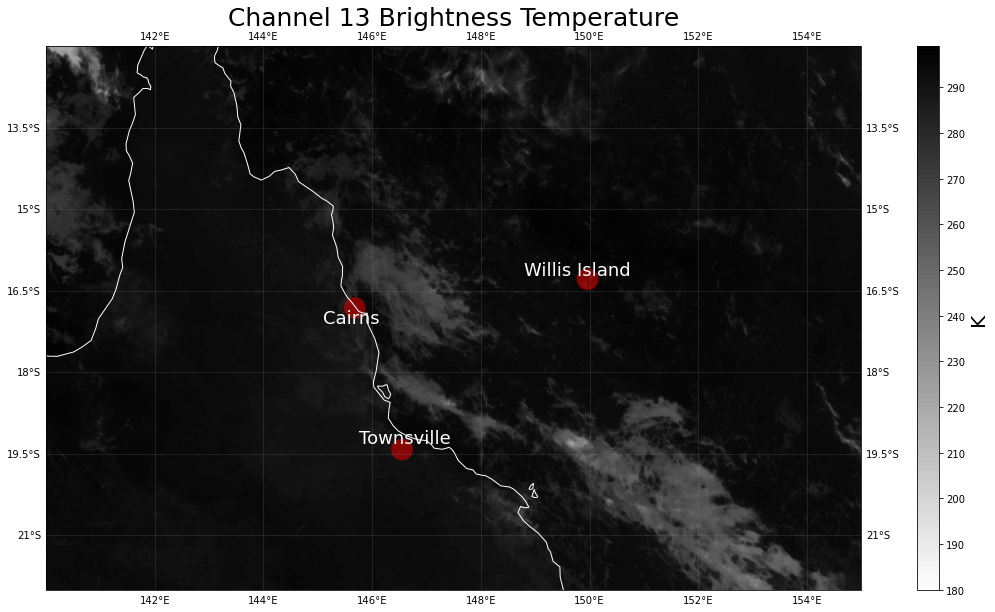

In [7]:
projPC = ccrs.PlateCarree()
lonW = 140
lonE = 155
latS = -22
latN = -12
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '50m'
lon = ds["pixel_longitude"]
lat = ds["pixel_latitude"]
clevels = range(180,300,1)

fig = plt.figure(figsize=(20, 10))
fig.tight_layout()
fig.patch.set_facecolor('white')
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Channel 13 Brightness Temperature',fontsize=25)
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
ax.annotate("Townsville",(145.75,-19.3),fontsize=18,color="white")
ax.annotate("Cairns",(145.1,-17.1),fontsize=18,color="white")
ax.annotate("Willis Island",(148.8,-16.2),fontsize=18,color="white")
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.2, linestyle='-')
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
#nan_cmap = np.isnan(ds["himawari_8_ahi_channel_13_brightness_temperature"])
#ax.pcolormesh(lon,lat,nan_cmap,color="black")
ax.coastlines(resolution=res, color='white')
cs = ax.contourf(lon,lat,ds["himawari_8_ahi_channel_13_brightness_temperature"],levels=clevels,cmap="binary")
cbar = plt.colorbar(cs,aspect=25,orientation='vertical',ax=ax,ticks=[180,190,200,210,220,230,240,250,260,270,280,290,300])
cbar.set_label('K',fontsize=20) 
circle_T = mpatches.Circle((146.5509,-19.4198),0.2,alpha=0.5,fc="red") # Townsville
circle_C = mpatches.Circle((145.683,-16.817),0.2,alpha=0.5,fc="red") # Cairns
circle_W = mpatches.Circle((149.9646,-16.2874),0.2,alpha=0.5,fc="red") # Willis Island
ax.add_patch(circle_T)
ax.add_patch(circle_C)
ax.add_patch(circle_W)

In [35]:
ds = xr.open_dataset(file, engine="netcdf4")
#coordinates = [(i, j) for j in range(11) for i in range(11)]
lat2d = ds.variables['pixel_latitude'][:,:]
lon2d = ds.variables['pixel_longitude'][:,:]
points = ds.himawari_8_ahi_channel_13_brightness_temperature
valuesCTT = ds.himawari_8_ahi_channel_13_brightness_temperature.values

CTT[:,:,t] = griddata(points, valuesCTT, (grid_x,grid_y), method='nearest')
#[ifg1:ifg2,jfg1:jfg2]
#lon2d = nc_fid.variables['pixel_longitude'][ifg1:ifg2,jfg1:jfg2]


NameError: name 'griddata' is not defined

In [14]:
ds.himawari_8_ahi_channel_13_brightness_temperature

<xarray.DataArray 'himawari_8_ahi_channel_13_brightness_temperature' (
                                                                      lines: 5500,
                                                                      elements: 5500)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: lines, elements
Attributes:
    reference:          all data are referenced to the instrument-native chan...
    algorithm_index:    32
    valid_range:        [-32767  32767]
    algorithm_name:     NA
    long_name:          pixel-resolution array of brightness temperatures for...
    valid_min:          -32767
    units:              K
    scaling_method:     1
    valid_max:          32767
    algorithm_version:  NA

In [20]:
def interpolation_near(x1, y1, x2, y2, x1grd, y1grd, method='nearest'):
    ''' Interpolate values of x2/y2 onto full-res grids of x1/y1 using
    linear interpolation of nearest points
    Parameters
    ----------
        x1 : 1D vector - X coordinates of keypoints on image 1
        y1 : 1D vector - Y coordinates of keypoints on image 1
        x2 : 1D vector - X coordinates of keypoints on image 2
        y2 : 1D vector - Y coordinates of keypoints on image 2
        x1grd : 1D vector - source X coordinate on img1
        y1grd : 1D vector - source Y coordinate on img2
        method : str - parameter for SciPy griddata
    Returns
    -------
        x2grd : 1D vector - destination X coordinate on img1
        y2grd : 1D vector - destination Y coordinate on img2
    '''
    src = np.array([y1, x1]).T
    dst = np.array([y1grd, x1grd]).T
    x2grd = griddata(src, x2, dst, method=method).T
    y2grd = griddata(src, y2, dst, method=method).T

mesh_grid = interpolation_near(ds.pixel_longitude,ds.pixel_latitude,)
#CTP[:,:,t] = griddata(points, valuesCTP, (grid_x, grid_y), method='nearest')

# random attempts

In [ ]:
lon_min = 143
lon_max = 153
lat_min = -20
lat_max = -15

mask_lon = (him8_ds["pixel_longitude"] >= lon_min) & (him8_ds["pixel_longitude"] <= lon_max)
mask_lat = (him8_ds["pixel_latitude"] >= lat_min) & (him8_ds["pixel_latitude"] <= lat_max)
cropped_ds = him8_ds.where(mask_lon & mask_lat, drop=True)

#cropped_ds = him8_ds.sel(him8_ds["pixel_latitude"]==slice(lat_min,lat_max), 
#                         him8_ds["pixel_longitude"]==slice(lon_min,lon_max))
cropped_ds["pixel_latitude"]

In [ ]:
lat_slice = slice(-20,-15)
lon_slice = slice(143,153)

plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.pcolormesh(cropped_ds["pixel_longitude"],cropped_ds["pixel_latitude"],
              him8_ds["ACHA_mode_8_cloud_top_temperature"],cmap="rainbow")#,vmin=-5,vmax=40)

In [ ]:
him8_ds = xr.open_dataset(file, engine="netcdf4")
# define variables
lat = him8_ds["pixel_latitude"]
lon = him8_ds["pixel_longitude"]
#lat  = latitude*(0.0027466658528397473)
#lon  = longitude*(0.005493331705679495)   

# set coordinates
him8_ds_coords = him8_ds.assign_coords({"lat":lat,"lon":lon})
cloud_top_temp = him8_ds_coords['ACHA_mode_8_cloud_top_temperature']

In [ ]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.pcolormesh(him8_ds["pixel_longitude"],him8_ds["pixel_latitude"],
              him8_ds_coords["ACHA_mode_8_cloud_top_temperature"].sel(lon==slice(143,153),
                                                lat==slice(-20,-15)),cmap="rainbow")

# claires method?

In [ ]:
lat2d = nc_fid.variables['pixel_latitude'][ifg1:ifg2,jfg1:jfg2]
lon2d = nc_fid.variables['pixel_longitude'][ifg1:ifg2,jfg1:jfg2]
CTP[:,:,t] = griddata(points, valuesCTP, (grid_x, grid_y), method='nearest')


In [ ]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
him8_ds.ACHA_mode_8_cloud_top_temperature.plot(ax=ax)

In [ ]:
him8_ds.ACHA_mode_8_cloud_top_temperature.plot()

In [ ]:
# plot cloud_top_temp variable
#plt.figure(figsize=(14, 6))
#ax = plt.axes(projection=ccrs.PlateCarree())
him8_ds_coords.ACHA_mode_8_cloud_top_temperature.plot()
#ax.coastlines()
#ax.set_ylim([-90, 0]);

In [ ]:
him8_ds_coords.ACHA_mode_8_cloud_top_temperature.plot(x="elements",y="lines")

In [ ]:
him8_ds.ACHA_mode_8_cloud_top_temperature.attrs
him8_ds.pixel_latitude.attrs
him8_ds.pixel_longitude.attrs

In [ ]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
him8_ds_coords.ACHA_mode_8_cloud_top_temperature.sel(lines=range(0,3500),
                        elements=range(100,4124)).plot(ax=ax)

In [ ]:
him8_ds_coords.ACHA_mode_8_cloud_top_temperature.isel(lines=2000).head()

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14, 4))
him8_ds.pixel_latitude.plot(ax=ax1)
him8_ds.pixel_longitude.plot(ax=ax2)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
him8_ds.pixel_latitude.plot(ax=ax)

In [ ]:
him8_ds.pixel_longitude.plot()

In [ ]:
# read dataset
him8_ds = xr.open_dataset(file, engine="netcdf4")

# define variables
latitude = him8_ds["pixel_latitude"]
longitude = him8_ds["pixel_longitude"]
lat  = latitude*(0.0027466658528397473)
lon  = longitude*(0.005493331705679495)      

# set coordinates
him8_ds_coords = him8_ds.assign_coords({"lat":lat,"lon":lon})
cloud_top_temp = him8_ds_coords['ACHA_mode_8_cloud_top_temperature']
# 5500 elements in lat/lon variable lengths: 
# lon: slice between 140-155 --> 5500/118.65=46.35 points per degree --> element index 2800 - 4000
# ds meta: Longitude_Range :[ 70.14741516 188.79821777]
# lat: slice between -12 -- -22 --> 5500/180=30.5 points per degree --> lines index 2077 - 2383
# ds meta: Latitude_Range :[-51.41923523  23.08965302]
#cloud_top_temp.isel(lines=slice(1500,4500),elements=slice(4277,4736)).plot(ax=ax,cmap="rainbow")

# plot
fig = plt.figure(1, figsize=[25,13])
fig.patch.set_facecolor('white')
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
#cloud_top_temp.isel(lat=slice(1500,4500),lon=slice(2800,4000)).plot(ax=ax,cmap="rainbow")
cloud_top_temp
cloud_top_temp.plot(ax=ax, transform=ccrs.PlateCarree(), x="lon", y="lat", add_colorbar=False)


In [ ]:
him8_ds["pixel_longitude"].attrs

In [ ]:
him8_ds = xr.open_dataset(file, engine="netcdf4")
# define variables
#latitude = him8_ds["pixel_latitude"]
#longitude = him8_ds["pixel_longitude"]
#lat  = latitude*(0.0027466658528397473)
#lon  = longitude*(0.005493331705679495)   

# set coordinates
#him8_ds_coords = him8_ds.assign_coords({"lat":lat,"lon":lon})
#cloud_top_temp = him8_ds_coords['ACHA_mode_8_cloud_top_temperature']
 
data = him8_ds['ACHA_mode_8_cloud_top_temperature']

data_where = np.where(data==0,np.nan,data)
lat_data = np.array(him8_ds['pixel_latitude'])
lat_where = np.where(lat_data==-999.0,0,lat_data)
lon_data = np.array(him8_ds['pixel_longitude'])
lon_where = np.where(lon_data==-999.0,0,lon_data)
    
lat_array = him8_ds["pixel_latitude"]
lat_central = lat_array.mean()
lon_array = him8_ds["pixel_longitude"]
lon_central = lon_array.mean()
    
lon_min = him8_ds["pixel_longitude"].attrs.__getitem__('valid_min')
lat_min = him8_ds["pixel_latitude"].attrs.__getitem__('valid_min')   
lon_max = him8_ds["pixel_longitude"].attrs.__getitem__('valid_max')
lat_max = him8_ds["pixel_latitude"].attrs.__getitem__('valid_max')
projection=ccrs.Orthographic(central_longitude=lon_central, central_latitude=lat_central,globe=None)

In [ ]:
ax = plt.subplot(projection=projection)
#plt.plot(lon_where,lat_where,data_where, transform=ccrs.PlateCarree(), zorder=2)
ax.coastlines(zorder=3)


In [ ]:
def make_cloud_image(file,projection):
    him8_ds = xr.open_dataset(file, engine="netcdf4")
    data = him8_ds['ACHA_mode_8_cloud_top_temperature']
    data_where = np.where(data==0,np.nan,data)
    lat_data = np.array(him8_ds['pixel_latitude'])
    lat_where = np.where(lat_data==-999.0,0,lat_data)
    lon_data = np.array(him8_ds['pixel_longitude'])
    lon_where = np.where(lon_data==-999.0,0,lon_data)
    
    lat_array = him8_ds["pixel_latitude"]
    lat_central = lat_array.mean()
    lon_array = him8_ds["pixel_longitude"]
    lon_central = lon_array.mean()
    
    lon_min = him8_ds["pixel_longitude"].attrs.__getitem__('valid_min')
    lat_min = him8_ds["pixel_latitude"].attrs.__getitem__('valid_min')   
    lon_max = him8_ds["pixel_longitude"].attrs.__getitem__('valid_max')
    lat_max = him8_ds["pixel_latitude"].attrs.__getitem__('valid_max')
    projection=ccrs.Orthographic(central_longitude=lon_central, central_latitude=lat_central,globe=None)
    
    ax = plt.subplot(projection=projection)
        
   # plt.pcolormesh(lon_where,lat_where,data_where, cmap=cmap, transform=ccrs.PlateCarree(), zorder=2)
    plt.pcolormesh(lon_where,lat_where,data_where, cmap="coolwarm", transform=ccrs.PlateCarree(), zorder=2)
    ax.coastlines(zorder=3)
    
    #plt.savefig(f'{filename[:-4]}.png')
    
make_cloud_image(file)